In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("datasets_4123_6408_framingham.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
data.size

67840

In [6]:
data=data.dropna()

In [7]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


In [9]:
print(data.groupby('TenYearCHD').size())

TenYearCHD
0    3101
1     557
dtype: int64


In [11]:
X=data[data.columns]
X=X.drop(columns=['TenYearCHD'])
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [14]:
P=data['TenYearCHD']
P.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [17]:
from sklearn.feature_selection import SelectKBest,chi2
test=SelectKBest(score_func=chi2,k=10)
fit=test.fit(X,P)
print(fit.scores_)

[ 17.10775088 296.20034419   7.73328653   0.68647384 155.7983075
  28.19156867   8.5078328   82.84545536  31.06762071 250.49020507
 669.13602117 142.52181427  15.78543627   2.91728745 379.91423514]


In [24]:
X.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [30]:
X=data[['age','cigsPerDay','totChol','sysBP','diaBP','glucose']]
X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,glucose
0,39,0.0,195.0,106.0,70.0,77.0
1,46,0.0,250.0,121.0,81.0,76.0
2,48,20.0,245.0,127.5,80.0,70.0
3,61,30.0,225.0,150.0,95.0,103.0
4,46,23.0,285.0,130.0,84.0,85.0


In [31]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B98E524988>,
      dtype=object)

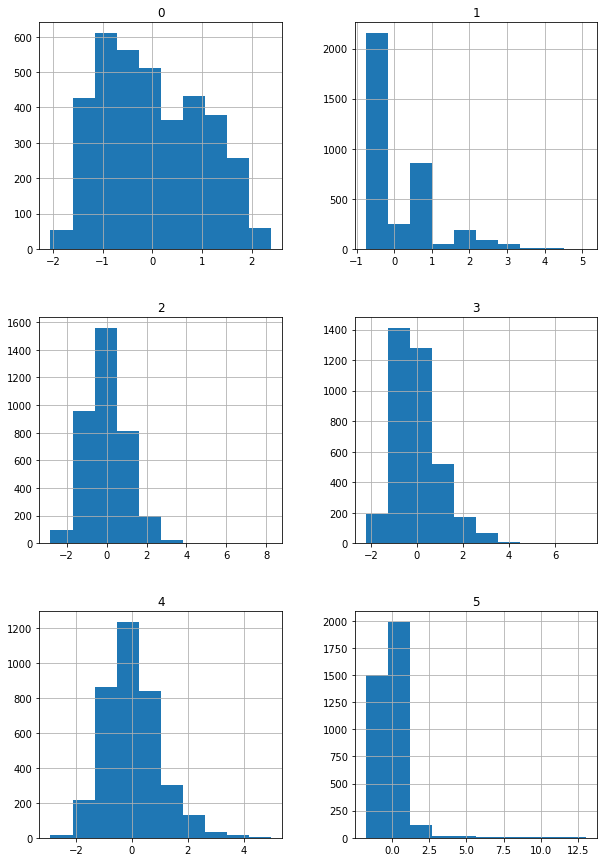

In [34]:
fig=plt.figure(figsize=(10,15))            #HISTOGRAM PLOTTING
ax = fig.gca()
pd.DataFrame(X).hist(ax = ax)

In [35]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(( 'KN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SV',SVC()))


In [37]:
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_result=cross_val_score(model,X,P,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg=("%s: %f (%f)" % (name,cv_result.mean(),cv_result.std()))
    print(msg)

LR: 0.852374 (0.018165)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DT: 0.749584 (0.024669)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KN: 0.833240 (0.019112)
NB: 0.827221 (0.021678)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SV: 0.847180 (0.017508)


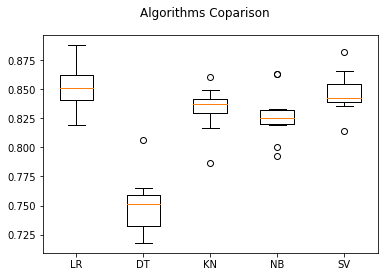

In [40]:
import matplotlib.pyplot as plt ##comparison the algorythm
fig=plt.figure()
fig.suptitle('Algorithms Coparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,P,test_size=0.2,random_state=1)

In [43]:
my_model=LogisticRegression()
my_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
result=my_model.score(x_test,y_test)
print('Accuracy : ' ,(result*100))

Accuracy :  84.42622950819673
